In [60]:
import pandas as pd
import numpy as np
import mlrose_hiive
import matplotlib.pyplot as plt
import time as tm

# directly using tree was not working so had to import thr sklearner separately 
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import f1_score



In [4]:
cd ~/

/Users/ssandesh


In [61]:
dataset1 = pd.read_csv('ML_Gatech/Project2/dataset/water_potability.csv')
dataset1 = shuffle(dataset1) 
dataset1.dropna(inplace=True)
X  = dataset1.iloc[:, :-1]
Y =  dataset1.iloc[:, -1]
print(dataset1['Potability'].value_counts())
X = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=10)


0    1200
1     811
Name: Potability, dtype: int64


In [62]:
# Reference :
# https://mlrose.readthedocs.io/en/stable/source/neural.html?highlight=neural%20netweok#module-mlrose.neural


# Random Hill Climbing 

In [67]:
random_state = 7
random_hill_model = []
for i in range(1, 5000, 100):
    nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [8], activation = 'relu', 
                                        algorithm = 'random_hill_climb', max_iters = i, 
                                        bias = True, is_classifier = True, learning_rate = 0.6, 
                                        early_stopping = True, clip_max = 5, max_attempts = 100, 
                                        random_state = random_state)
        
    start_time = tm.time()
    nn_model1.fit(X_train, y_train)
    end_time = tm.time()
    train_time = end_time - start_time
   
    start_time = tm.time()
    y_train_pred = nn_model1.predict(X_train)
    end_time = tm.time()
    test_time = end_time - start_time
    
    y_train_accuracy = metrics.accuracy_score(y_train, y_train_pred)*100
    f1score_train=f1_score(y_train, y_train_pred)
    y_test_pred = nn_model1.predict(X_test)
    y_test_accuracy = metrics.accuracy_score(y_test, y_test_pred)*100
    f1score_test=f1_score(y_test, y_test_pred)
    random_hill_model.append([i, y_train_accuracy, y_test_accuracy, f1score_train, 
                              f1score_test, train_time, test_time])
    

In [68]:
random_hill_model = np.array(random_hill_model)

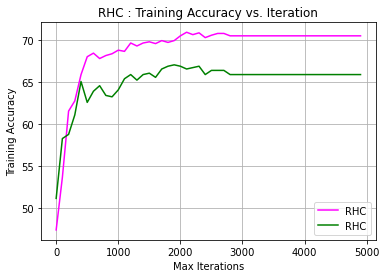

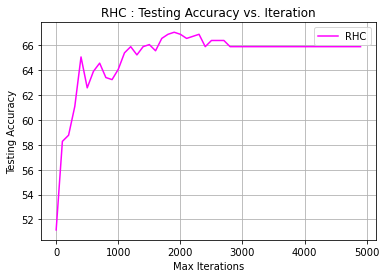

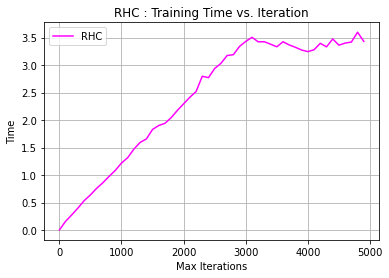

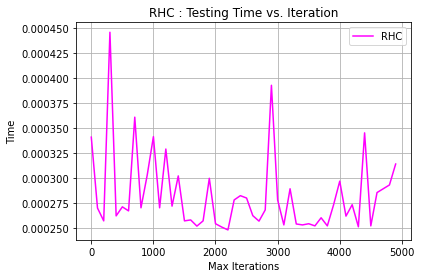

In [69]:
plt.figure()
plt.plot(random_hill_model[:,[0]], random_hill_model[:,[1]],  label='RHC', color='magenta')
plt.plot(random_hill_model[:,[0]], random_hill_model[:,[2]],  label='RHC', color='green')
plt.title('RHC : Training Accuracy vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Training Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

plt.figure()
plt.plot(random_hill_model[:,[0]], random_hill_model[:,[2]],  label='RHC', color='magenta')
plt.title('RHC : Testing Accuracy vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Testing Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

plt.figure()
plt.plot(random_hill_model[:,[0]], random_hill_model[:,[-2]],  label='RHC', color='magenta')
plt.title('RHC : Training Time vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Time")
plt.legend(loc="best")
plt.grid()
plt.show()

plt.figure()
plt.plot(random_hill_model[:,[0]], random_hill_model[:,[-1]],  label='RHC', color='magenta')
plt.title('RHC : Testing Time vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Time")
plt.legend(loc="best")
plt.grid()
plt.show()


## Simulate Annealing 


In [70]:
random_state = 7
sa_model = []
for i in range(1, 5000, 100):
    nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [8], activation = 'relu', 
                                        algorithm = 'simulated_annealing',
                                        schedule = mlrose_hiive.GeomDecay(), max_iters = i, 
                                        bias = True, is_classifier = True, learning_rate = 0.6, 
                                        early_stopping = True, clip_max = 5, max_attempts = 100, 
                                        random_state = random_state)
        
    start_time = tm.time()
    nn_model1.fit(X_train, y_train)
    end_time = tm.time()
    train_time = end_time - start_time
   
    start_time = tm.time()
    y_train_pred = nn_model1.predict(X_train)
    end_time = tm.time()
    test_time = end_time - start_time
    
    y_train_accuracy = metrics.accuracy_score(y_train, y_train_pred)*100
    f1score_train=f1_score(y_train, y_train_pred)
    y_test_pred = nn_model1.predict(X_test)
    y_test_accuracy = metrics.accuracy_score(y_test, y_test_pred)*100
    f1score_test=f1_score(y_test, y_test_pred)
    sa_model.append([i, y_train_accuracy, y_test_accuracy, f1score_train,f1score_test, train_time, test_time])

In [71]:
sa_model = np.array(sa_model)

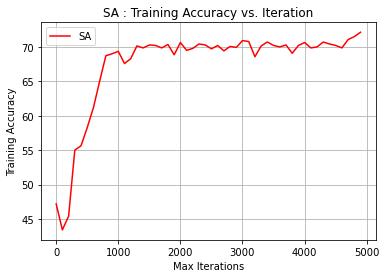

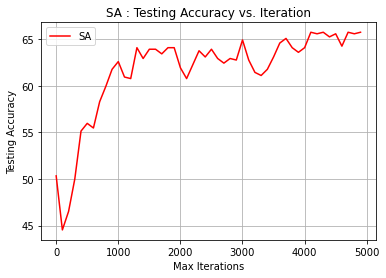

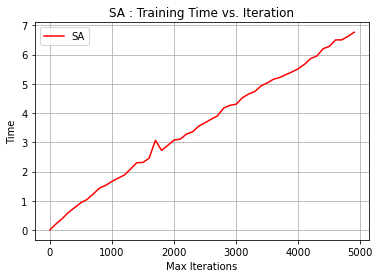

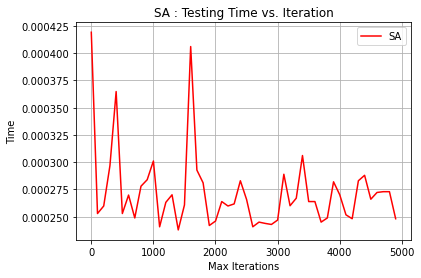

In [72]:
plt.figure()
plt.plot(sa_model[:,[0]], sa_model[:,[1]],  label='SA', color='red')
plt.title('SA : Training Accuracy vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Training Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

plt.figure()
plt.plot(sa_model[:,[0]], sa_model[:,[2]],  label='SA', color='red')
plt.title('SA : Testing Accuracy vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Testing Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

plt.figure()
plt.plot(sa_model[:,[0]], sa_model[:,[-2]],  label='SA', color='red')
plt.title('SA : Training Time vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Time")
plt.legend(loc="best")
plt.grid()
plt.show()

plt.figure()
plt.plot(sa_model[:,[0]], sa_model[:,[-1]],  label='SA', color='red')
plt.title('SA : Testing Time vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Time")
plt.legend(loc="best")
plt.grid()
plt.show()

## Gradient Descent 

In [73]:
random_state = 7
gradient_descent = []
for i in range(1, 5000, 100):
    nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [8], activation = 'relu', 
                                        algorithm = 'gradient_descent', max_iters = i,
                                        bias = True, is_classifier = True, learning_rate = 0.6, 
                                        early_stopping = True, clip_max = 5, max_attempts = 100, 
                                        random_state = random_state)
        
    start_time = tm.time()
    nn_model1.fit(X_train, y_train)
    end_time = tm.time()
    train_time = end_time - start_time
   
    start_time = tm.time()
    y_train_pred = nn_model1.predict(X_train)
    end_time = tm.time()
    test_time = end_time - start_time
    
    y_train_accuracy = metrics.accuracy_score(y_train, y_train_pred)*100
    f1score_train=f1_score(y_train, y_train_pred)

    y_test_pred = nn_model1.predict(X_test)
    y_test_accuracy = metrics.accuracy_score(y_test, y_test_pred)*100
    f1score_test=f1_score(y_test, y_test_pred)
    
    gradient_descent.append([i, y_train_accuracy, y_test_accuracy, f1score_train,f1score_test,train_time,test_time])
    

In [74]:
gradient_descent = np.array(gradient_descent)

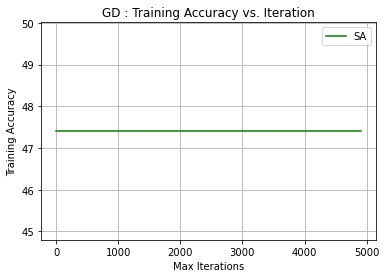

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


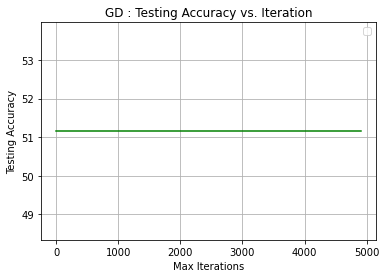

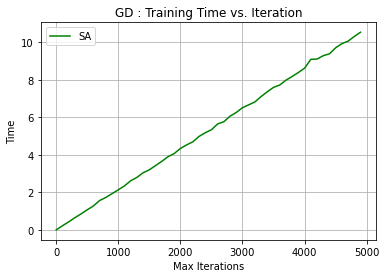

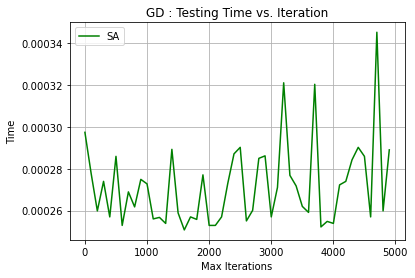

In [75]:
plt.figure()
plt.plot(gradient_descent[:,[0]], gradient_descent[:,[1]],  label='SA', color='green')
plt.title('GD : Training Accuracy vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Training Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

plt.figure()
plt.plot(gradient_descent[:,[0]], gradient_descent[:,[2]],  label='', color='green')
plt.title('GD : Testing Accuracy vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Testing Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

plt.figure()
plt.plot(gradient_descent[:,[0]], gradient_descent[:,[-2]],  label='SA', color='green')
plt.title('GD : Training Time vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Time")
plt.legend(loc="best")
plt.grid()
plt.show()

plt.figure()
plt.plot(gradient_descent[:,[0]], gradient_descent[:,[-1]],  label='SA', color='green')
plt.title('GD : Testing Time vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Time")
plt.legend(loc="best")
plt.grid()
plt.show()

## Genetic Algorithm

In [76]:
random_state = 7
genetic_algorithm = []
for i in range(1, 5000, 100):
    nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [8], activation = 'relu', 
                                        algorithm = 'genetic_alg', max_iters = i,
                                        pop_size = 50, mutation_prob = 0.1,
                                        bias = True, is_classifier = True, learning_rate = 0.6, 
                                        early_stopping = True, clip_max = 5, max_attempts = 100, 
                                        random_state = random_state)
        
    start_time = tm.time()
    nn_model1.fit(X_train, y_train)
    end_time = tm.time()
    train_time = end_time - start_time
   
    start_time = tm.time()
    y_train_pred = nn_model1.predict(X_train)
    end_time = tm.time()
    test_time = end_time - start_time
    
    y_train_accuracy = metrics.accuracy_score(y_train, y_train_pred)*100
    f1score_train=f1_score(y_train, y_train_pred)

    y_test_pred = nn_model1.predict(X_test)
    y_test_accuracy = metrics.accuracy_score(y_test, y_test_pred)*100
    f1score_test=f1_score(y_test, y_test_pred)
    
    genetic_algorithm.append([i, y_train_accuracy, y_test_accuracy, f1score_train,f1score_test, train_time,test_time])

In [77]:
genetic_algorithm = np.array(genetic_algorithm)

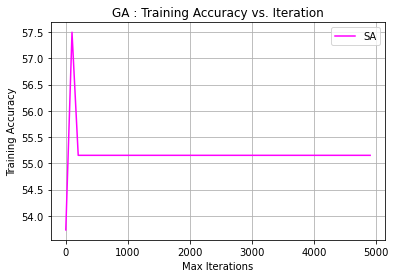

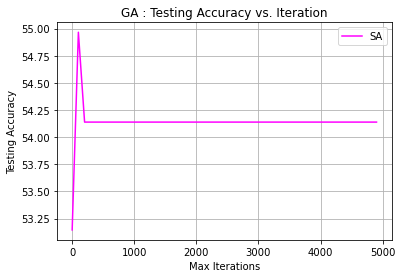

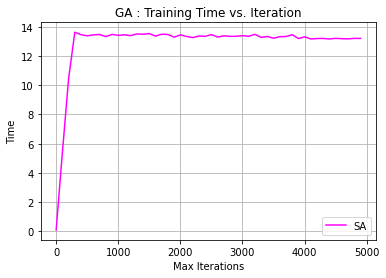

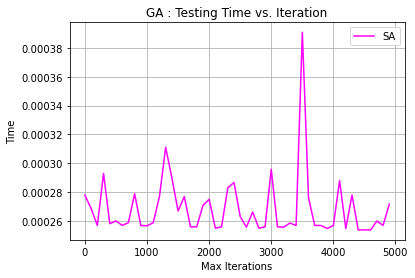

In [78]:
plt.figure()
plt.plot(genetic_algorithm[:,[0]], genetic_algorithm[:,[1]],  label='SA', color='magenta')
plt.title('GA : Training Accuracy vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Training Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

plt.figure()
plt.plot(genetic_algorithm[:,[0]], genetic_algorithm[:,[2]],  label='SA', color='magenta')
plt.title('GA : Testing Accuracy vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Testing Accuracy")
plt.legend(loc="best")
plt.grid()
plt.show()

plt.figure()
plt.plot(genetic_algorithm[:,[0]], genetic_algorithm[:,[-2]],  label='SA', color='magenta')
plt.title('GA : Training Time vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Time")
plt.legend(loc="best")
plt.grid()
plt.show()

plt.figure()
plt.plot(genetic_algorithm[:,[0]], genetic_algorithm[:,[-1]],  label='SA', color='magenta')
plt.title('GA : Testing Time vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Time")
plt.legend(loc="best")
plt.grid()
plt.show()

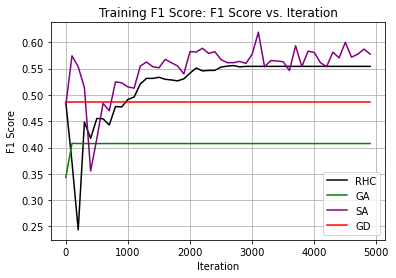

In [83]:
plt.figure()
plt.plot(random_hill_model[:,[0]], random_hill_model[:,[3]],  label='RHC', color='black')
plt.plot(genetic_algorithm[:,[0]], genetic_algorithm[:,[3]],  label='GA', color='green')
plt.plot(sa_model[:,[0]], sa_model[:,[3]],  label='SA', color='purple')
plt.plot(gradient_descent[:,[0]], gradient_descent[:,[3]],  label='GD', color='red')

plt.title('Training F1 Score: F1 Score vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid()
plt.show()


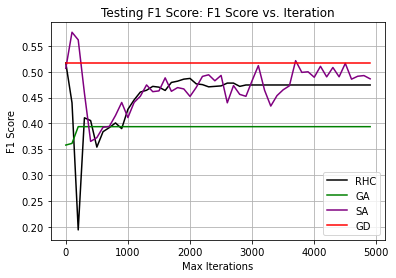

In [84]:
plt.figure()
plt.plot(random_hill_model[:,[0]], random_hill_model[:,[4]],  label='RHC', color='black')
plt.plot(genetic_algorithm[:,[0]], genetic_algorithm[:,[4]],  label='GA', color='green')
plt.plot(sa_model[:,[0]], sa_model[:,[4]],  label='SA', color='purple')
plt.plot(gradient_descent[:,[0]], gradient_descent[:,[4]],  label='GD', color='red')

plt.title('Testing F1 Score: F1 Score vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid()
plt.show()

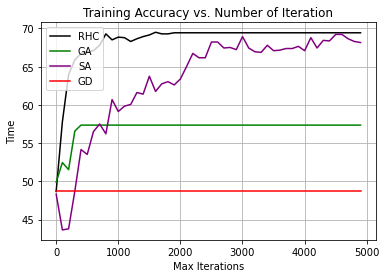

In [58]:
plt.figure()
plt.plot(random_hill_model[:,[0]], random_hill_model[:,[1]],  label='RHC', color='black')
plt.plot(genetic_algorithm[:,[0]], genetic_algorithm[:,[1]],  label='GA', color='green')
plt.plot(sa_model[:,[0]], sa_model[:,[1]],  label='SA', color='purple')
plt.plot(gradient_descent[:,[0]], gradient_descent[:,[1]],  label='GD', color='red')

plt.title('Training Accuracy vs. Number of Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Time")
plt.legend(loc="best")
plt.grid()
plt.show()

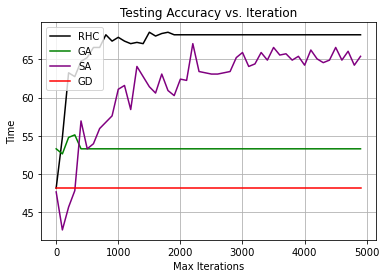

In [59]:
plt.figure()
plt.plot(random_hill_model[:,[0]], random_hill_model[:,[2]],  label='RHC', color='black')
plt.plot(genetic_algorithm[:,[0]], genetic_algorithm[:,[2]],  label='GA', color='green')
plt.plot(sa_model[:,[0]], sa_model[:,[2]],  label='SA', color='purple')
plt.plot(gradient_descent[:,[0]], gradient_descent[:,[2]],  label='GD', color='red')

plt.title('Testing Accuracy vs. Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid()
plt.show()

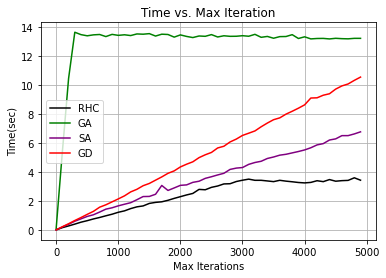

In [88]:
plt.figure()
plt.plot(random_hill_model[:,[0]], random_hill_model[:,[-2]],  label='RHC', color='black')
plt.plot(genetic_algorithm[:,[0]], genetic_algorithm[:,[-2]],  label='GA', color='green')
plt.plot(sa_model[:,[0]], sa_model[:,[-2]],  label='SA', color='purple')
plt.plot(gradient_descent[:,[0]], gradient_descent[:,[-2]],  label='GD', color='red')

plt.title('Time vs. Max Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Time(sec)")
plt.legend(loc="best")
plt.grid()
plt.show()

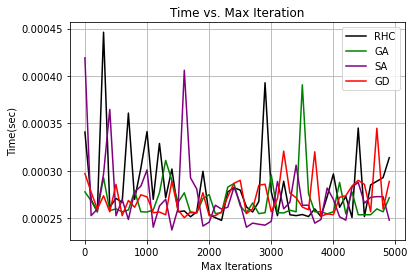

In [89]:
plt.figure()
plt.plot(random_hill_model[:,[0]], random_hill_model[:,[-1]],  label='RHC', color='black')
plt.plot(genetic_algorithm[:,[0]], genetic_algorithm[:,[-1]],  label='GA', color='green')
plt.plot(sa_model[:,[0]], sa_model[:,[-1]],  label='SA', color='purple')
plt.plot(gradient_descent[:,[0]], gradient_descent[:,[-1]],  label='GD', color='red')

plt.title('Time vs. Max Iteration')
plt.xlabel('Max Iterations')
plt.ylabel("Time(sec)")
plt.legend(loc="best")
plt.grid()
plt.show()